In [2]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('dataset_med.csv')

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [6]:
df.isnull().sum()   # no missing values

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:
df.nunique()

id                    890000
age                       95
gender                     2
country                   27
diagnosis_date          3651
cancer_stage               4
family_history             2
smoking_status             4
bmi                      291
cholesterol_level        151
hypertension               2
asthma                     2
cirrhosis                  2
other_cancer               2
treatment_type             4
end_treatment_date      4194
survived                   2
dtype: int64

<Axes: >

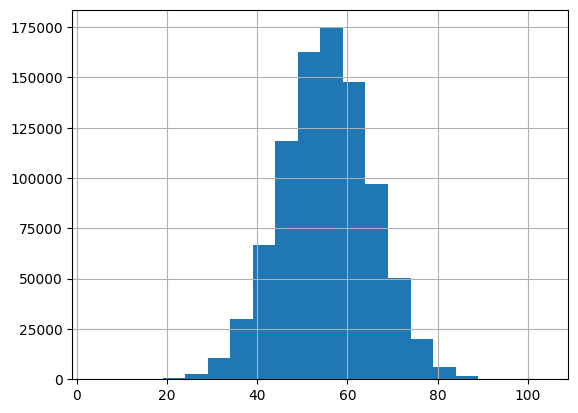

In [8]:
df['age'].hist(bins=20)


In [9]:
df.duplicated().sum()

0

<Axes: xlabel='gender', ylabel='count'>

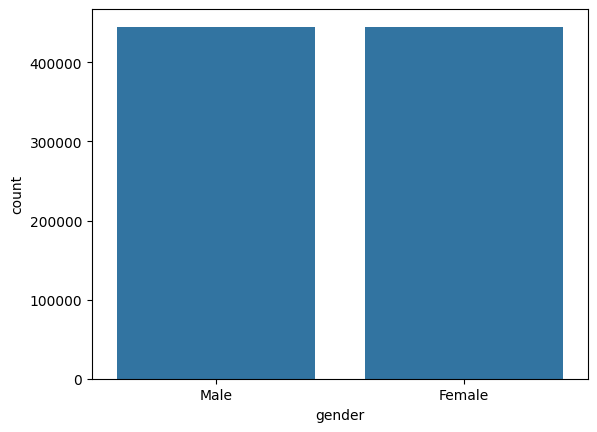

In [10]:
sns.countplot(df, x = 'gender')

<Axes: xlabel='gender', ylabel='count'>

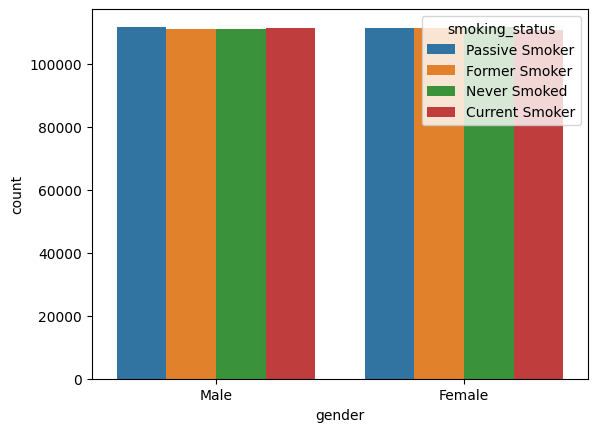

In [11]:
sns.countplot(df, x = 'gender', hue='smoking_status')

In [12]:
df['new_survived']= df['survived'].replace([1,0], ['Survived','Not Survived'])
df.new_survived.head()

0    Not Survived
1        Survived
2    Not Survived
3    Not Survived
4    Not Survived
Name: new_survived, dtype: object

<Axes: xlabel='gender', ylabel='count'>

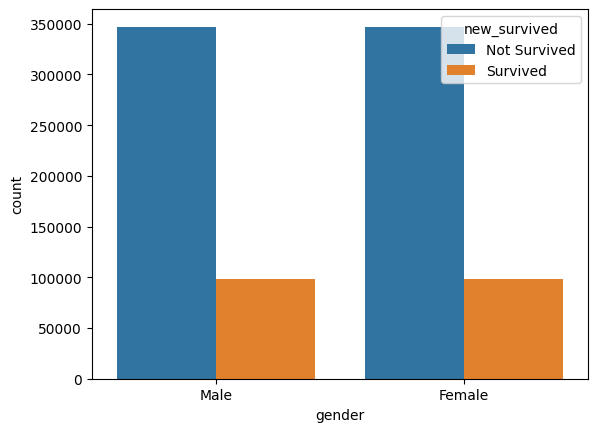

In [13]:
sns.countplot(df, x = 'gender', hue='new_survived')

<Axes: ylabel='bmi'>

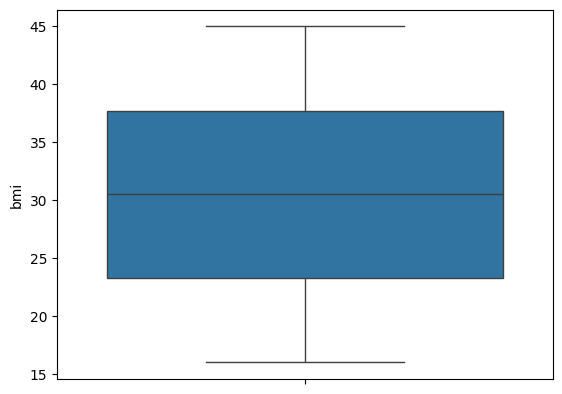

In [14]:
sns.boxplot(data=df['bmi'])


<Axes: xlabel='cholesterol_level', ylabel='Density'>

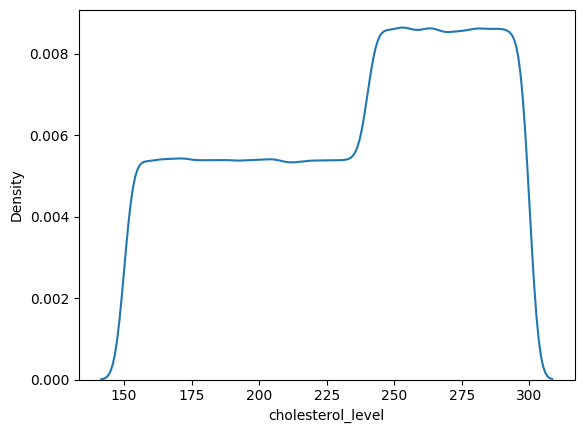

In [15]:
sns.kdeplot(df['cholesterol_level'])

In [16]:
country_smokers = df.groupby(['country','smoking_status']).size().reset_index(name='count')
country_smokers.head()

,country,smoking_status,count
0,Austria,Current Smoker,8236
1,Austria,Former Smoker,8220
2,Austria,Never Smoked,8136
3,Austria,Passive Smoker,8240
4,Belgium,Current Smoker,8183


<Axes: xlabel='country', ylabel='count'>

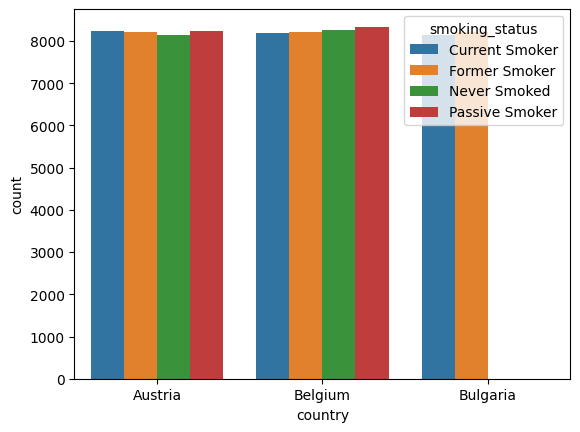

In [17]:
sns.barplot(data=country_smokers[:10], x = 'country', y='count', hue='smoking_status')

In [18]:
country_survive = df.groupby(['country','new_survived']).size().reset_index(name='count')
country_survive.head()

,country,new_survived,count
0,Austria,Not Survived,25679
1,Austria,Survived,7153
2,Belgium,Not Survived,25743
3,Belgium,Survived,7243
4,Bulgaria,Not Survived,25384


<Axes: xlabel='country', ylabel='count'>

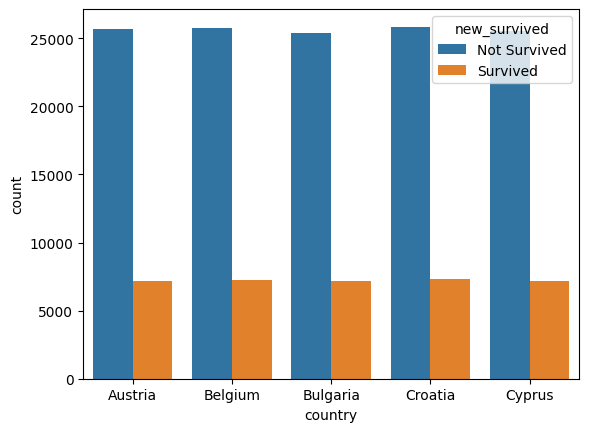

In [19]:
sns.barplot(data=country_survive[:10], x ='country', y = 'count', hue='new_survived')

In [2]:
import os
import sys
from dataclasses import dataclass

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from src.LungCancerDetection.exception import CustomException
from src.LungCancerDetection.logger import logging
from src.LungCancerDetection.utils import save_object

In [5]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's